<a href="https://colab.research.google.com/github/rushi2012/Suicide_prediction/blob/main/suicide_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Import CSV file
df = pd.read_csv('/content/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [99]:
df.shape

(27820, 12)

In [100]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [102]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [103]:
#Drop unnecessary columns
df = df.drop(['HDI for year','country-year','suicides/100k pop'], axis =1)

In [104]:
# Check 
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers


In [105]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [106]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['sex'] = en.fit_transform(df['sex'])
df['country'] = en.fit_transform(df['country'])
df['generation'] = en.fit_transform(df['generation'])
df['age'] = en.fit_transform(df['age'])

In [107]:
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,"2,156,624,900",796,2
1,0,1987,1,2,16,308000,"2,156,624,900",796,5
2,0,1987,0,0,14,289700,"2,156,624,900",796,2
3,0,1987,1,5,1,21800,"2,156,624,900",796,1
4,0,1987,1,1,9,274300,"2,156,624,900",796,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  int64 
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  int64 
 3   age                 27820 non-null  int64 
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6    gdp_for_year ($)   27820 non-null  object
 7   gdp_per_capita ($)  27820 non-null  int64 
 8   generation          27820 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ MB


In [109]:
df['age'].value_counts()

5    4642
4    4642
2    4642
1    4642
0    4642
3    4610
Name: age, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  int64 
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  int64 
 3   age                 27820 non-null  int64 
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6    gdp_for_year ($)   27820 non-null  object
 7   gdp_per_capita ($)  27820 non-null  int64 
 8   generation          27820 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ MB


In [111]:
df[' gdp_for_year ($) '].replace(',','' ,regex=True ,inplace=True)


In [112]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(int)

In [113]:
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,2156624900,796,2
1,0,1987,1,2,16,308000,2156624900,796,5
2,0,1987,0,0,14,289700,2156624900,796,2
3,0,1987,1,5,1,21800,2156624900,796,1
4,0,1987,1,1,9,274300,2156624900,796,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   country             27820 non-null  int64
 1   year                27820 non-null  int64
 2   sex                 27820 non-null  int64
 3   age                 27820 non-null  int64
 4   suicides_no         27820 non-null  int64
 5   population          27820 non-null  int64
 6    gdp_for_year ($)   27820 non-null  int64
 7   gdp_per_capita ($)  27820 non-null  int64
 8   generation          27820 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


In [115]:
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=.25)

In [117]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)


In [118]:
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))


0.414637565060075


In [130]:
comp_lr = pd.DataFrame({'y_test': y_test,'Pred':y_pred})
comp_lr

,y_test,Pred
8562,18,-145.793905
3444,119,-27.998018
19763,0,-116.098194
14030,132,-63.510360
66,6,-216.045966
...,...,...
20782,646,384.706322
586,0,168.724814
9455,4,-99.348501
9220,1905,828.251493


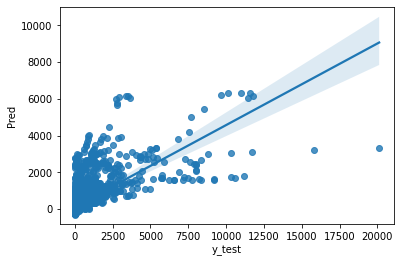

In [131]:
sns.regplot(x='y_test',y='Pred',data=comp_lr)

In [119]:
print(cross_val_score(lr,X,y,cv=5))

[-3.36715823  0.55856365  0.51614286  0.24927093  0.43541842]


In [120]:
from sklearn.ensemble import RandomForestRegressor
rfrl = RandomForestRegressor()
rfrl = rfrl.fit(x_train, y_train)
test_pred = rfrl.predict(x_test)
rfrl_score=rfrl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfrl_score))
print(r2_score(y_test, test_pred))

The Random forest model accuracy is 0.9724049764131635
0.9724049764131635


In [121]:
from sklearn.model_selection import cross_val_score

In [126]:
print(cross_val_score(rfrl,x_train,y_train,cv=5))

[0.95612136 0.96359769 0.96696008 0.95956506 0.97736898]


In [127]:
acc = cross_val_score(rfrl,x_train,y_train,cv = 10)
print(acc.mean())

0.9677573704938396


In [128]:
comp = pd.DataFrame({'y_test': y_test,'Pred':test_pred})
comp

,y_test,Pred
8562,18,12.73
3444,119,84.90
19763,0,0.81
14030,132,103.37
66,6,8.45
...,...,...
20782,646,600.11
586,0,0.29
9455,4,8.05
9220,1905,1996.66


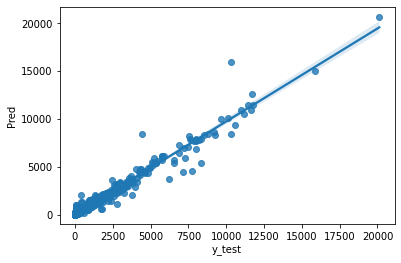

In [129]:
sns.regplot(x='y_test',y='Pred',data=comp)